## Análise IDESP
Nesse notebook vamos analisar alguns dados do idesp, que avalia a qualidade das escolas.
Link -> https://dados.educacao.sp.gov.br/node/5/download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [2]:
# Carregando os arquivos e vendo suas primeiras cinco linhas
idesp = pd.read_csv(r'idesp_serie.csv')
idesp.head()

,CodigoCIE,CodigoINEP,CodigoDiretoria,NomeDiretoria,NomeEscola,NomeMunicipio,NivelEnsino,Ano2011,Ano2012,Ano2013,Ano2014,Ano2015,Ano2016,Ano2017
0,206,35000206,10101,NORTE 1,ALIPIO DE BARROS PROFESSOR ...,SAO PAULO,AI,3.85,4.53,4.27,5.49,4.94,5.18,5.20
1,2082,35002082,10205,LESTE 5,BLANCA ZWICKER SIMOES PROFESSORA ...,SAO PAULO,AI,6.42,5.95,6.83,6.64,6.62,7.13,7.41
2,3165,35003165,10208,LESTE 4,JANDYRA VIEIRA CUNHA BARRA PROFA ...,SAO PAULO,AI,4.23,4.50,3.59,4.92,4.57,4.91,5.43
3,681,35000681,10102,CENTRO,TOLEDO BARBOSA ...,SAO PAULO,AI,4.72,4.13,4.70,4.58,4.54,5.35,5.53
4,449,35000449,10102,CENTRO,TAUNAY VISCONDE DE ...,SAO PAULO,AI,4.69,5.93,7.11,8.03,6.25,5.97,6.90


In [3]:
# O arquivo foi lido da maneira correta, logo não é necessário manipular o dataframe. Podemos ver toda sa suas colunas usando
idesp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623 entries, 0 to 9622
Data columns (total 14 columns):
CodigoCIE          9623 non-null int64
CodigoINEP         9623 non-null int64
CodigoDiretoria    9623 non-null int64
NomeDiretoria      9623 non-null object
NomeEscola         9623 non-null object
NomeMunicipio      9623 non-null object
NivelEnsino        9623 non-null object
Ano2011            8998 non-null float64
Ano2012            8964 non-null float64
Ano2013            8832 non-null float64
Ano2014            8859 non-null float64
Ano2015            8535 non-null float64
Ano2016            8910 non-null float64
Ano2017            8886 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 902.2+ KB


In [4]:
# Como há colunas em que temos dados faltantes (entries: 9623, enquanto há colunas com 8535 dados por exemplo), vamos tirar
# essas linhas do nosso dataframe por que eles podem causar problemas no futuro
idesp = idesp.dropna()
idesp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 9622
Data columns (total 14 columns):
CodigoCIE          7906 non-null int64
CodigoINEP         7906 non-null int64
CodigoDiretoria    7906 non-null int64
NomeDiretoria      7906 non-null object
NomeEscola         7906 non-null object
NomeMunicipio      7906 non-null object
NivelEnsino        7906 non-null object
Ano2011            7906 non-null float64
Ano2012            7906 non-null float64
Ano2013            7906 non-null float64
Ano2014            7906 non-null float64
Ano2015            7906 non-null float64
Ano2016            7906 non-null float64
Ano2017            7906 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 803.0+ KB


In [5]:
# Podemos, também, mudar o nome das colunas de Ano2011, Ano2012... Para somente os anos em si:
idesp.rename(columns={'Ano2011': '2011', 'Ano2012': '2012', 'Ano2013': '2013', 'Ano2014': '2014', 'Ano2015': '2015',
                     'Ano2016': '2016', 'Ano2017': '2017'}, inplace=True)
idesp.head()

,CodigoCIE,CodigoINEP,CodigoDiretoria,NomeDiretoria,NomeEscola,NomeMunicipio,NivelEnsino,2011,2012,2013,2014,2015,2016,2017
0,206,35000206,10101,NORTE 1,ALIPIO DE BARROS PROFESSOR ...,SAO PAULO,AI,3.85,4.53,4.27,5.49,4.94,5.18,5.20
1,2082,35002082,10205,LESTE 5,BLANCA ZWICKER SIMOES PROFESSORA ...,SAO PAULO,AI,6.42,5.95,6.83,6.64,6.62,7.13,7.41
2,3165,35003165,10208,LESTE 4,JANDYRA VIEIRA CUNHA BARRA PROFA ...,SAO PAULO,AI,4.23,4.50,3.59,4.92,4.57,4.91,5.43
3,681,35000681,10102,CENTRO,TOLEDO BARBOSA ...,SAO PAULO,AI,4.72,4.13,4.70,4.58,4.54,5.35,5.53
4,449,35000449,10102,CENTRO,TAUNAY VISCONDE DE ...,SAO PAULO,AI,4.69,5.93,7.11,8.03,6.25,5.97,6.90


In [6]:
# Agora, com o número dos dados corrigidos, temos que todas as colunas vieram com seus dados do tipo certo. Vamos ver 
#quantos valores diferentes tem a coluna NivelEnsino, que contém variáveis categóricas:
idesp['NivelEnsino'].value_counts()

AF    3336
EM    3258
AI    1312
Name: NivelEnsino, dtype: int64

In [7]:
# Podemos ver a quantidade de piores notas no ano de 2011:
idesp['2011'].nsmallest(5)

8837    0.33
6896    0.38
6975    0.44
6011    0.53
9559    0.57
Name: 2011, dtype: float64

In [8]:
# O python utilizou a coluna CodigoCIE para mostrar quais escolas tem essas notas. Como isso é pouco intuitivo sobre qual
# escola está sendo atribuida essa nota, podemos mudar o indice do DataFrame para o nome das escolas:
idesp.index = idesp['NomeEscola']
# Agora utilizando o comando nsmallest novamente:
idesp['2011'].nsmallest(5)

NomeEscola
JOSE BARBOSA DE ARAUJO VEREADOR                                 0.33
JUAREZ TAVORA MARECHAL                                          0.38
ALVARO DE SOUZA LIMA DOUTOR                                     0.44
ERMELINO MATARAZZO                                              0.53
PAULINA MADRE                                                   0.57
Name: 2011, dtype: float64

In [9]:
# Agora podemos usar para as maiores notas também:
idesp['2011'].nlargest(5)

NomeEscola
CESAR LACERDA DE VERGUEIRO SENADOR                              8.95
ANTONIA BINATO SILVA VO NINA                                    8.58
ASSENTAMENTO SANTA ZELIA                                        7.92
LIONS CLUBE                                                     7.86
SIMAO DA SILVA                                                  7.86
Name: 2011, dtype: float64

In [10]:
# Vamos excluir a coluna NomeEscola do meio do dataframe, já que temos ele no indice:
idesp = idesp.drop(labels='NomeEscola', axis=1)
idesp.head()

,CodigoCIE,CodigoINEP,CodigoDiretoria,NomeDiretoria,NomeMunicipio,NivelEnsino,2011,2012,2013,2014,2015,2016,2017
NomeEscola,,,,,,,,,,,,,
ALIPIO DE BARROS PROFESSOR,206,35000206,10101,NORTE 1,SAO PAULO,AI,3.85,4.53,4.27,5.49,4.94,5.18,5.20
BLANCA ZWICKER SIMOES PROFESSORA,2082,35002082,10205,LESTE 5,SAO PAULO,AI,6.42,5.95,6.83,6.64,6.62,7.13,7.41
JANDYRA VIEIRA CUNHA BARRA PROFA,3165,35003165,10208,LESTE 4,SAO PAULO,AI,4.23,4.50,3.59,4.92,4.57,4.91,5.43
TOLEDO BARBOSA,681,35000681,10102,CENTRO,SAO PAULO,AI,4.72,4.13,4.70,4.58,4.54,5.35,5.53
TAUNAY VISCONDE DE,449,35000449,10102,CENTRO,SAO PAULO,AI,4.69,5.93,7.11,8.03,6.25,5.97,6.90


In [11]:
# Esse tipo de análise, porém, perde sua efetividade já que há 3 tipos de escolas diferentes. Podemos escolher o tipo de
# escola e ver como isso muda nossa interpretação. Utilizando os dados do ensino médio primeiro:
idesp[idesp['NivelEnsino'] == 'EM']['2011'].nlargest(5)

NomeEscola
SAMUEL DE CASTRO NEVES DOUTOR                                   5.98
PEDRO MASCARI                                                   5.52
FRANCISCO DE PAULA ABREU SODRE DR                               5.36
ANIS DABUS DR                                                   4.81
FERNANDO BRASIL PROF                                            4.62
Name: 2011, dtype: float64

In [12]:
idesp[idesp['NivelEnsino'] == 'EM']['2011'].nsmallest(5)

NomeEscola
JOSE BARBOSA DE ARAUJO VEREADOR                                 0.33
JUAREZ TAVORA MARECHAL                                          0.38
ALVARO DE SOUZA LIMA DOUTOR                                     0.44
ERMELINO MATARAZZO                                              0.53
PAULINA MADRE                                                   0.57
Name: 2011, dtype: float64

In [13]:
# Surpreendetemente, entre todas as escolas estaduais do Estado de São Paulo, em 2011, as escolas que obtiveram os piores
# níveis são do ensino médio.
# Podemos agora ver se essas escolas continuam como as cinco piores/melhores do estado em nível de ensino médio
# ao longo do ano:
escolas_baixo_indice = {}
escolas_alto_indice = {}
for i in idesp.columns[6:14]:
    escolas_baixo_indice[i] = idesp[idesp['NivelEnsino'] == 'EM'][i].nsmallest()
    escolas_alto_indice[i] = idesp[idesp['NivelEnsino'] == 'EM'][i].nlargest()
for k, v in escolas_baixo_indice.items():
    print(f'{k}: {v}')

2011: NomeEscola
JOSE BARBOSA DE ARAUJO VEREADOR                                 0.33
JUAREZ TAVORA MARECHAL                                          0.38
ALVARO DE SOUZA LIMA DOUTOR                                     0.44
ERMELINO MATARAZZO                                              0.53
PAULINA MADRE                                                   0.57
Name: 2011, dtype: float64
2012: NomeEscola
JOSE PORPHYRIO DA PAZ                                           0.51
AGOSTINHO GRIGOLETO                                             0.62
PEDRO BRASIL BANDECCHI PROF                                     0.63
ARMANDO DE SALLES OLIVEIRA DR                                   0.64
MESSIAS FREIRE PROFESSOR                                        0.64
Name: 2012, dtype: float64
2013: NomeEscola
BAIRRO SANTA RITA DO PONTAL                                     0.24
ALVARO DE SOUZA LIMA DOUTOR                                     0.44
FERNANDO MAURO PIRES DA ROCHA DEPUTADO                          0.4

In [14]:
# Como é um pouco difícil visualizar bem o que os dados querem dizer nesse formato, podemos utilizar gráficos. Para isso,
# iremos realizar uma média entre os piores/melhores de cada ano:
medias_baixo_indice = {}
medias_alto_indice = {}
medias_total_em = {}
for i in idesp.columns[6:14]:
    medias_baixo_indice[i] = np.mean(idesp[idesp['NivelEnsino'] == 'EM'][i].nsmallest().values) 
    medias_alto_indice[i] = np.mean(idesp[idesp['NivelEnsino'] == 'EM'][i].nlargest().values)
    medias_total_em[i] = np.mean(idesp[idesp['NivelEnsino'] == 'EM'][i].values)
medias_baixo_indice

{'2011': 0.45,
 '2012': 0.608,
 '2013': 0.414,
 '2014': 0.534,
 '2015': 0.316,
 '2016': 0.544,
 '2017': 0.6}

<BarContainer object of 7 artists>

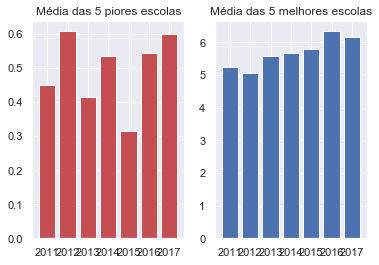

In [15]:
# Vamos fazer 2 plots para comparar a volatividade das notas das piores escolas com as melhores (em média)
sns.set()
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
plt.title('Média das 5 piores escolas')
plt.bar(x=list(medias_baixo_indice.keys()), height=list(medias_baixo_indice.values()), color='r')
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=1)
plt.title('Média das 5 melhores escolas')
plt.bar(x=list(medias_alto_indice.keys()), height=list(medias_alto_indice.values()), color='b')

Text(0.5, 0, 'Notas')

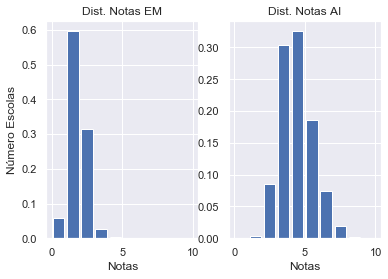

In [16]:
# Podemos usar 2 histogramas para ver como as notas se distribuem ao longo das escolas de diferentes níveis
dist_notas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
plt.hist(idesp[idesp['NivelEnsino'] == 'EM']['2011'].values, dist_notas, histtype='bar', rwidth=0.8, density=True)
plt.title('Dist. Notas EM')
plt.ylabel('Número Escolas')
plt.xlabel('Notas')
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=1)
plt.hist(idesp[idesp['NivelEnsino'] == 'AI']['2011'].values, dist_notas, histtype='bar', rwidth=0.8, density=True)
plt.title('Dist. Notas AI')
plt.xlabel('Notas')

In [17]:
# É possível analisar facilmente que nenhuma escola do ensino médio em SP tem nota maior que 5 no IDESP, e há uma grande
# concetração de dados ao redor das notas 2 e 3, enquanto em AI a média fica mais próxima do 5, e há cerca de 25% de escolas
# com nota maior do que 5, no ano de 2011.

In [18]:
# Podemos, agora, ver qual a média de desempenho do ensino médio na capital por região e depois realizar uma regressão com
# variáveis dummy, para verificar qual o peso do tipo de escola sobre a nota do idesp em 2011.
# Criando outro df apenas com a capital:
df_capital = idesp[idesp['NomeMunicipio'] == 'SAO PAULO']
df_capital_em = df_capital[df_capital['NivelEnsino'] == 'EM']
df_capital_em['NomeMunicipio'].value_counts()

SAO PAULO    518
Name: NomeMunicipio, dtype: int64

In [19]:
# Agora podemos realizar a média com cada região. No total são 13:
# Separar pelo EM é importante, se não, considerando que algumas regiões podem ter mais escolas de um outro nível em que a
# distribuição de notas é maior pelo fato da escola não ser ensino médio, isso pode afetar a média de forma muito forte
df_capital_em['NomeDiretoria'].value_counts()

SUL 3           60
LESTE 2         47
NORTE 1         46
SUL 2           46
LESTE 3         44
LESTE 1         42
LESTE 4         41
SUL 1           40
LESTE 5         36
NORTE 2         35
CENTRO SUL      31
CENTRO          26
CENTRO OESTE    24
Name: NomeDiretoria, dtype: int64

In [20]:
regioes = {}
for regiao in df_capital_em['NomeDiretoria'].value_counts().index:
        regioes[regiao] = np.mean(df_capital_em[df_capital_em['NomeDiretoria'] == regiao]['2011'])
regioes

{'SUL 3': 1.4209999999999998,
 'LESTE 2': 1.2308510638297874,
 'NORTE 1': 1.341086956521739,
 'SUL 2': 1.248695652173913,
 'LESTE 3': 1.2181818181818178,
 'LESTE 1': 1.4276190476190476,
 'LESTE 4': 1.4380487804878048,
 'SUL 1': 1.2907499999999998,
 'LESTE 5': 1.8149999999999997,
 'NORTE 2': 1.5945714285714285,
 'CENTRO SUL': 1.6574193548387097,
 'CENTRO': 1.8503846153846153,
 'CENTRO OESTE': 1.9375}

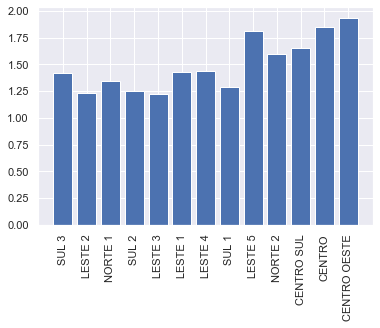

In [21]:
plt.bar(x=list(regioes.keys()), height=list(regioes.values()))
plt.xticks(rotation='vertical')
plt.show()

In [22]:
# Agora, por último, podemos iniciar a fazer a regressão. Ela consistirá em explicar as notas do idesp 2011 em função da
# da região em que a escola está localizada e o nível de ensino (se é ensino médio, por exemplo):
# Para isso, teremos que transformar nossas variáveis das duas colunas em dummys:
dummy = pd.get_dummies(df_capital['NivelEnsino'])
df_capital = pd.concat([df_capital, dummy], axis=1)
df_capital.head()

,CodigoCIE,CodigoINEP,CodigoDiretoria,NomeDiretoria,NomeMunicipio,NivelEnsino,2011,2012,2013,2014,2015,2016,2017,AF,AI,EM
NomeEscola,,,,,,,,,,,,,,,,
ALIPIO DE BARROS PROFESSOR,206,35000206,10101,NORTE 1,SAO PAULO,AI,3.85,4.53,4.27,5.49,4.94,5.18,5.20,0,1,0
BLANCA ZWICKER SIMOES PROFESSORA,2082,35002082,10205,LESTE 5,SAO PAULO,AI,6.42,5.95,6.83,6.64,6.62,7.13,7.41,0,1,0
JANDYRA VIEIRA CUNHA BARRA PROFA,3165,35003165,10208,LESTE 4,SAO PAULO,AI,4.23,4.50,3.59,4.92,4.57,4.91,5.43,0,1,0
TOLEDO BARBOSA,681,35000681,10102,CENTRO,SAO PAULO,AI,4.72,4.13,4.70,4.58,4.54,5.35,5.53,0,1,0
TAUNAY VISCONDE DE,449,35000449,10102,CENTRO,SAO PAULO,AI,4.69,5.93,7.11,8.03,6.25,5.97,6.90,0,1,0


In [30]:
# Realizando a regressão:
reg = smf.ols('Q("2011") ~ EM + AI', data=df_capital).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Q("2011")   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1939.
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:32:51   Log-Likelihood:                -1598.8
No. Observations:                1567   AIC:                             3204.
Df Residuals:                    1564   BIC:                             3220.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2788      0.030     77.120      0.000       2.221       2.337
EM            -0.8241      0.042    -19.730      0.000      -0.906      -0.742
AI             1.7045      0.041     41.081      0.000       1.623       1.786
==============================================================================
Omnibus:                      150.355   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.580
Skew:                           0.632   Prob(JB):                     4.35e-62
Kurtosis:                       4.652   Cond. No.                         3.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Podemos ver que, estudar em uma escola de ensino médio na cidade de SP diminui a nota da escola no idesp em 0,82 pontos.
# Os p-valores deram um resultado suficientemente satisfatório para que reijeitemos a hipótese nula. A variação dos dados é
# explicada por volta de 71,3% pelo nosso modelo.